
A classification problem where we have to predict whether a loan would be approved or not.

**About Dataset**

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands of dollars

Loan_Amount_Term : Term of loan in months

Credit_History : Credit history meets guidelines yes or no

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N) - Target variable

In [45]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,ConfusionMatrixDisplay,classification_report

import warnings
warnings.filterwarnings('ignore')

In [46]:
#Loading the datsaset
df=pd.read_csv('/content/drive/MyDrive/DataSet/LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
df.shape

(614, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
#checking for duplicates values
df.duplicated().sum()

0

In [50]:
#checking for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [52]:
#droping Loan_ID column from train data
df.drop('Loan_ID',axis=1,inplace=True)

In [53]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Exploratory Data Analysis (EDA)**

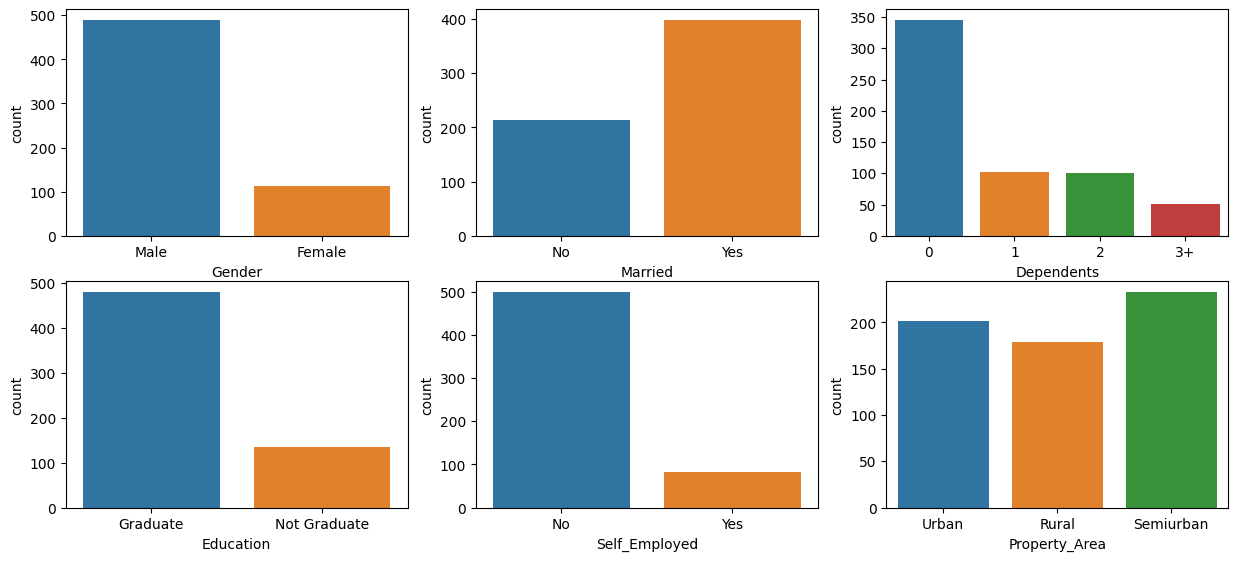

In [54]:
#categorical data
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
plt.figure(figsize=(15,10))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(data=df,x=i[1])


From above graphs,we can conclude that:
*   Male applicants is more than Female
*   Married applicant is more than Non-married
*   Most of the applicants don't have any dependents 
*   Graduate is more than non-Graduate
*   Non-Self-employed is more than Self-employed
*   Most of the applicants are from semi-urban areas

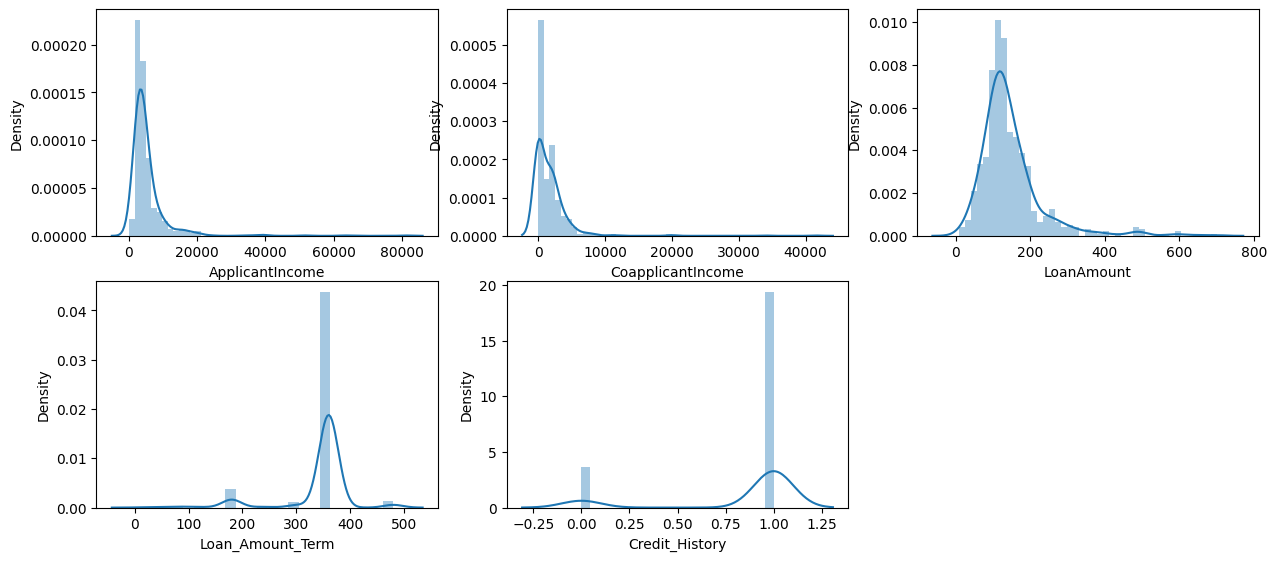

In [55]:
#numerical data
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

From the above graphs,it is clear that it is not normally distributed


In [56]:
for col in num_cols:
    df[col]=np.log(1+df[col])

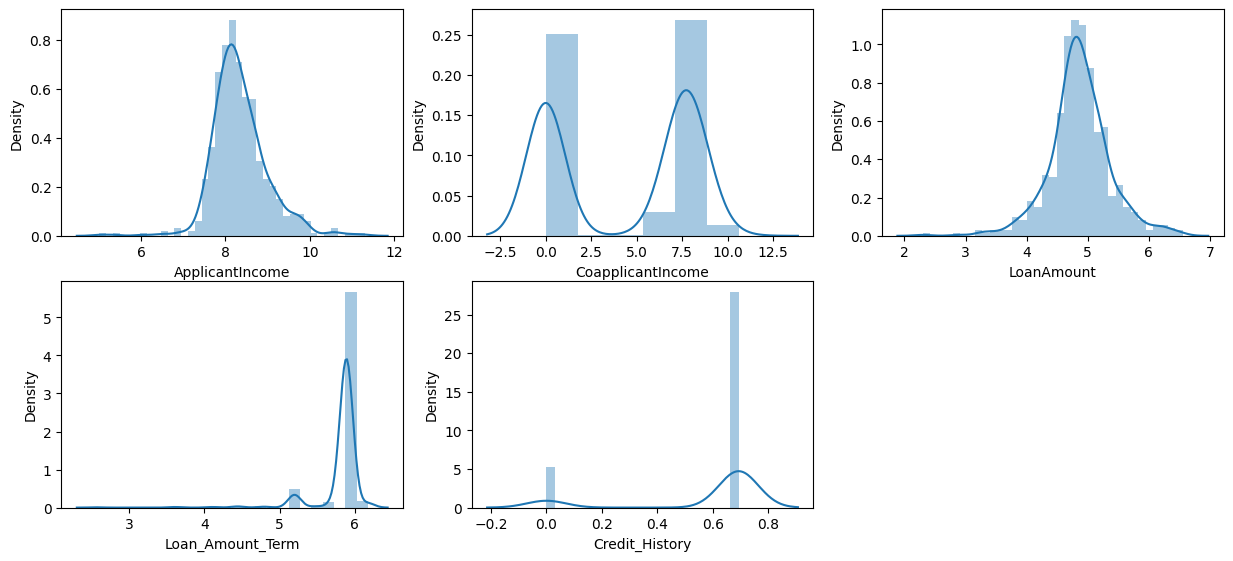

In [57]:
#graph after log transformation
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

**Handling Missing Value**

In [58]:
#filling missing value with mode
lst1=['Gender','Married', 'Dependents','Self_Employed','Loan_Amount_Term', 'Credit_History']
for i in lst1:
  df[i]=df[i].fillna(df[i].mode()[0])

In [59]:
#filling missing value with median
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [60]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [61]:
df['Dependents'].replace('3+',3,inplace=True)

In [62]:
df['Dependents']=df['Dependents'].astype('int')

Converting string to numerical values using LabelEncoder

In [63]:
le=LabelEncoder()
lst2=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in lst2:
  df[i]=le.fit_transform(df[i])

In [64]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

<Axes: >

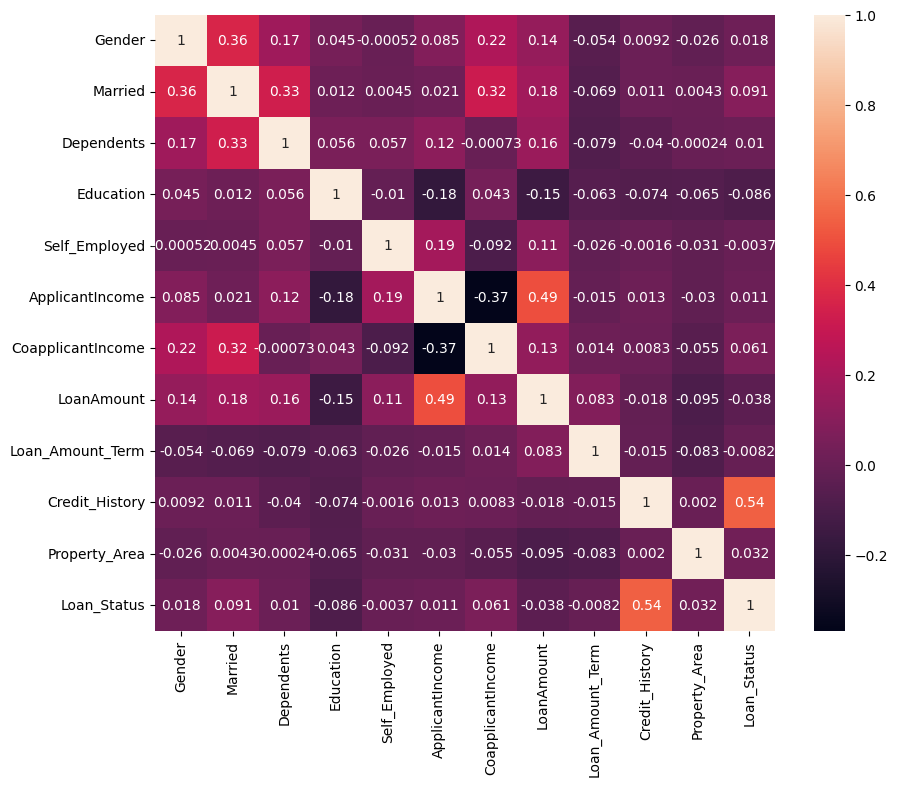

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable), which means that the Loan_Status is heavily dependent on the Credit_History

**Outlier detection**

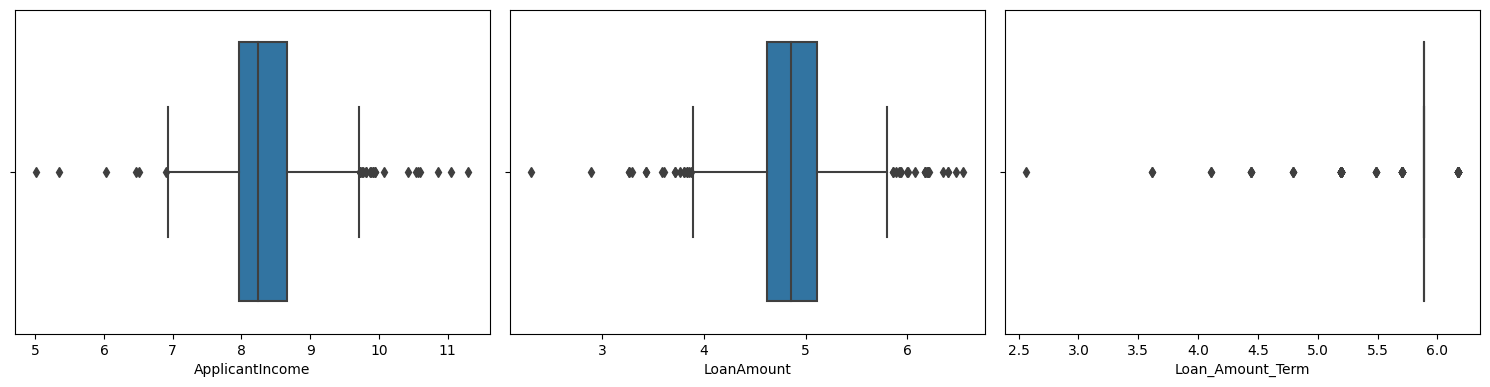

In [66]:
columns=df[['ApplicantIncome','LoanAmount','Loan_Amount_Term']]
plt.figure(figsize=(15,15))
plotnumber =1
for column in columns:
    if plotnumber<=15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=columns[column],data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Outlier removal using IQR method

In [67]:
def remove_outliers(df, columns, k=1.5):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [68]:
df = remove_outliers(df, columns)

In [69]:
df.shape

(483, 12)

boxplot after outlier removal

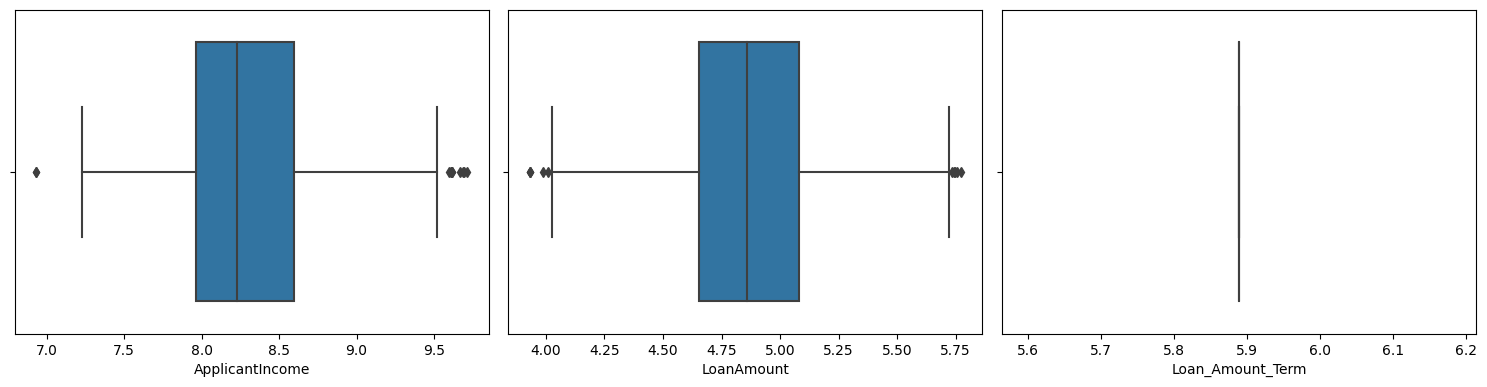

In [70]:
columns=df[['ApplicantIncome','LoanAmount','Loan_Amount_Term']]
plt.figure(figsize=(15,15))
plotnumber =1
for column in columns:
    if plotnumber<=15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=columns[column],data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [71]:
#splitting data into dependent and independent columns
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

**Imbalance data**

<Axes: xlabel='Loan_Status', ylabel='count'>

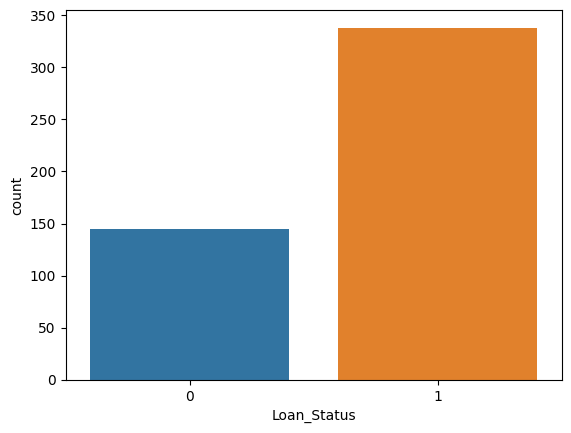

In [72]:
sns.countplot(x = df['Loan_Status'])

In [73]:
df['Loan_Status'].value_counts()

1    338
0    145
Name: Loan_Status, dtype: int64

Oversampling using SMOTE

In [74]:
X, y = SMOTE().fit_resample(X, y)

<Axes: xlabel='Loan_Status', ylabel='count'>

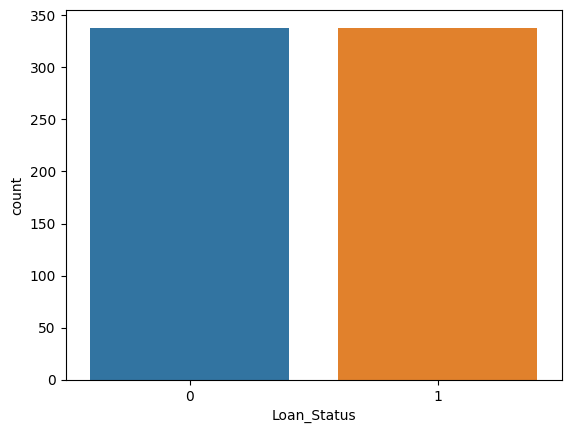

In [75]:
sns.countplot(x = y)

Scaling using StandardScaler

In [76]:
sc=StandardScaler()
X_new=sc.fit_transform(X)
X_new

array([[ 5.01848435e-01, -1.22625597e+00, -6.76089804e-01, ...,
        -8.88178420e-16,  5.43358805e-01,  1.24774563e+00],
       [ 5.01848435e-01,  8.15490423e-01,  3.48656177e-01, ...,
        -8.88178420e-16,  5.43358805e-01, -1.22579116e+00],
       [ 5.01848435e-01,  8.15490423e-01, -6.76089804e-01, ...,
        -8.88178420e-16,  5.43358805e-01,  1.24774563e+00],
       ...,
       [-1.99263349e+00, -1.22625597e+00, -6.76089804e-01, ...,
        -8.88178420e-16, -8.27042203e-01, -1.22579116e+00],
       [ 5.01848435e-01, -1.22625597e+00, -6.76089804e-01, ...,
        -8.88178420e-16, -2.02423538e+00,  1.09772343e-02],
       [ 5.01848435e-01,  8.15490423e-01, -6.76089804e-01, ...,
        -8.88178420e-16, -1.19980073e+00,  1.24774563e+00]])

In [77]:
#Splitting dataset into training and test set 
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.3)

****************************************************************************************************
LogisticRegression(random_state=1)
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       100
           1       0.76      0.87      0.81       103

    accuracy                           0.79       203
   macro avg       0.80      0.79      0.79       203
weighted avg       0.80      0.79      0.79       203

****************************************************************************************************
****************************************************************************************************
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.76      0.75      0.75       103

    accuracy                           0.75       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.75      0.75      0

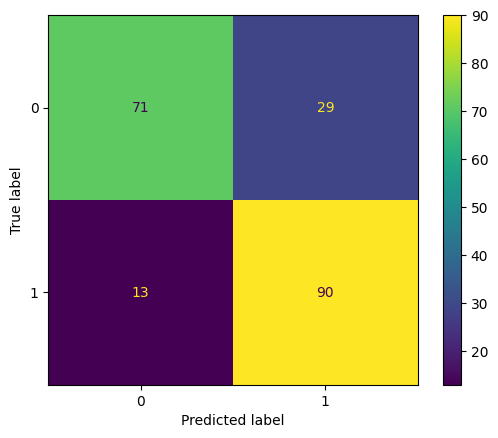

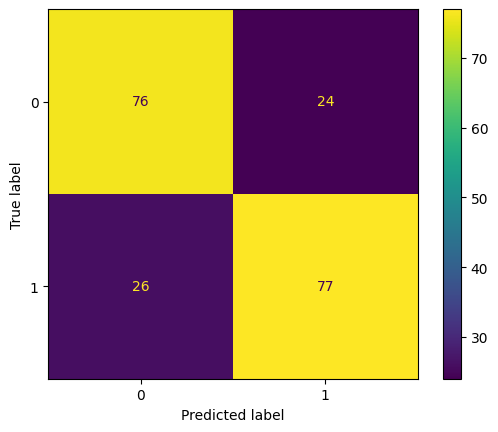

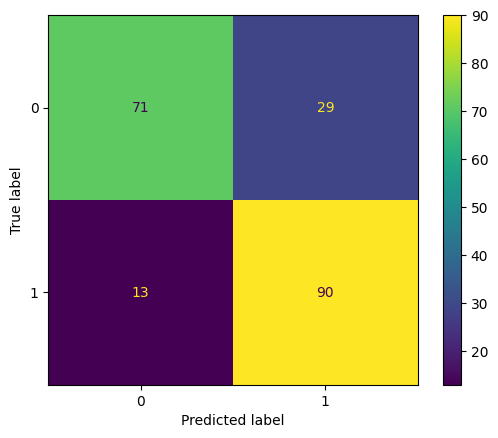

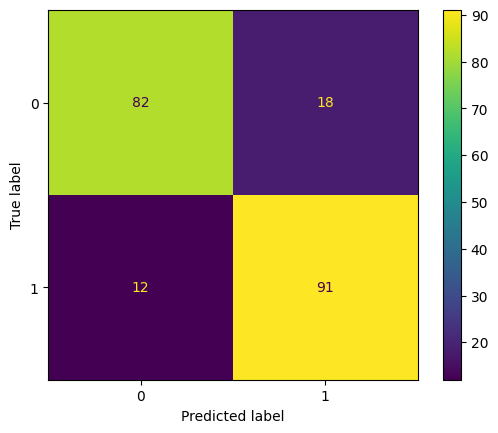

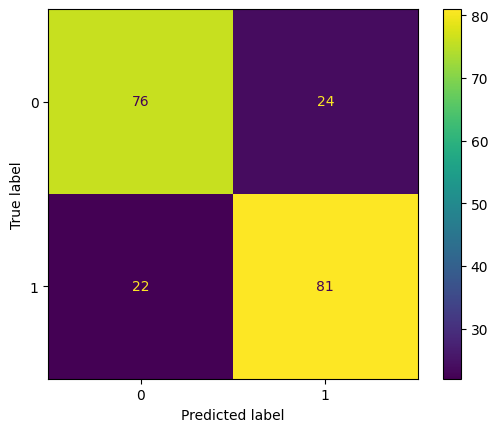

In [78]:
log=LogisticRegression(random_state=1)
knn=KNeighborsClassifier()
sv=SVC(random_state=1)
rf= RandomForestClassifier(random_state=1)
ab = AdaBoostClassifier( random_state=1)
lst=[log,knn,sv,rf,ab]
model_acc=[]
model_recall_score=[]
model_f1_score=[]
model_precision_score=[]
for model in lst:
  print('*'*100)
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  model_acc.append(accuracy_score(y_test,y_pred))
  model_recall_score.append(recall_score(y_test,y_pred))
  model_f1_score.append(f1_score(y_test,y_pred))
  model_precision_score.append(precision_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print('*'*100)

In [79]:
Models = ['Logistic regression','KNN','SVM','Random Forest','AdaBooster']
model_performance = pd.DataFrame({'Model':Models,'Accuracy_score':model_acc,'F1_score':model_f1_score,'Recall_score':model_recall_score,'Precision_score':model_precision_score})
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Logistic regression,0.793103,0.810811,0.873786,0.756303
1,KNN,0.753695,0.754902,0.747573,0.762376
2,SVM,0.793103,0.810811,0.873786,0.756303
3,Random Forest,0.852217,0.858491,0.883495,0.834862
4,AdaBooster,0.773399,0.778846,0.786408,0.771429




Random Forest algorithm gives us the maximum Accuracy ( approx. 85%) compared to the other four classification algorithms.


Now using Random Forest algorithm we are going to predict Loan Status

**Hyperparameter Tuning**

In [80]:
param_grid = {'bootstrap':[True,False],'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5,20,50,100]}

In [81]:
rf = RandomForestClassifier(random_state = 1)
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = 1, verbose = 0, return_train_score=True)

In [82]:
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}


In [91]:
rf = RandomForestClassifier(bootstrap = True, criterion ='gini', max_depth = 10, max_features = 'auto', n_estimators = 50)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [92]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred))
print('Precision Score is : ', precision_score(y_test,y_pred))
print('F1 score is : ', f1_score(y_test,y_pred))

Accuracy Score is :  0.8423645320197044
Recall Score is :  0.8737864077669902
Precision Score is :  0.8256880733944955
F1 score is :  0.8490566037735849


In [93]:
Y_pred=rf.predict(X_test)

In [94]:
result=pd.DataFrame({'Actual_values':y_test,'Predicted_values':Y_pred})
result

,Actual_values,Predicted_values
564,0,0
31,1,1
352,0,0
188,1,1
404,1,1
...,...,...
190,0,1
406,1,1
487,0,0
299,1,1


In [95]:
result['Predicted_values'].value_counts()

1    109
0     94
Name: Predicted_values, dtype: int64

In [96]:
result.to_csv('result.csv',index=False)